--- Testing DecisionTree Regressor ---


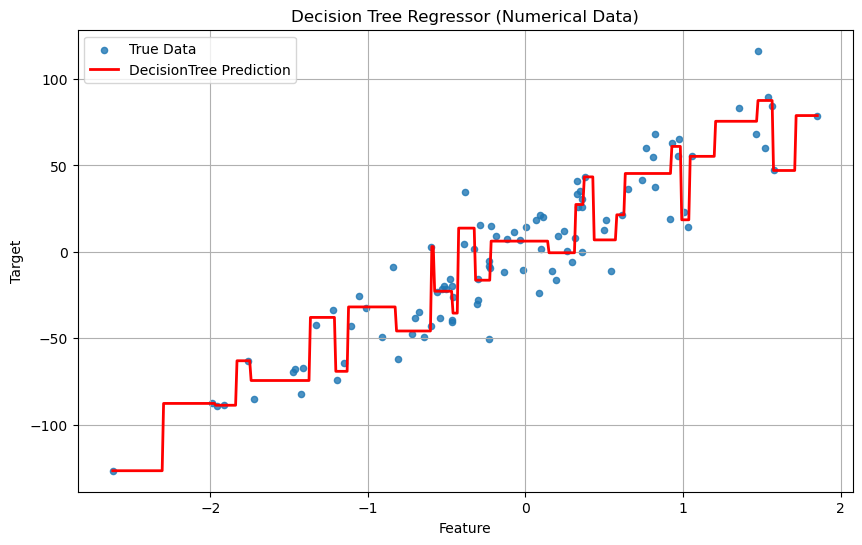

DecisionTree Regressor MSE on training data: 136.81

--- Testing DecisionTree Classifier ---
DecisionTree Classifier Accuracy on training data: 1.00


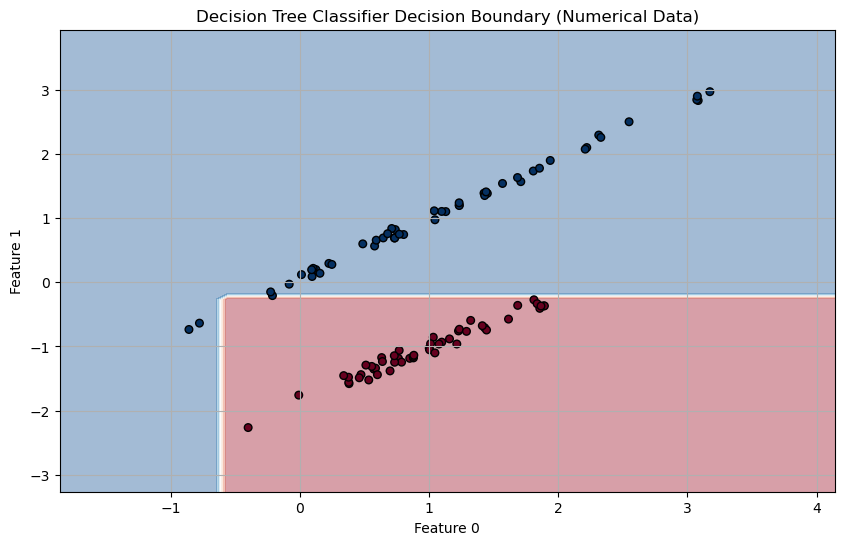

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split

# Import your DecisionTree class
import sys
sys.path.append('../') # Add parent directory to path to import boosting_from_scratch
from boosting_from_scratch.tree import DecisionTree

print("--- Testing DecisionTree Regressor ---")

# 1. Generate simple toy regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_reg = X_reg.reshape(-1, 1) # Ensure X is 2D

# Create a test set for visualization
X_test_reg = np.linspace(X_reg.min(), X_reg.max(), 500).reshape(-1, 1)

# 2. Instantiate and fit DecisionTree Regressor
# Using a max_depth to avoid overfitting too much on small data
reg_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='regressor')
reg_tree.fit(X_reg, y_reg)

# 3. Make predictions
y_pred_reg = reg_tree.predict(X_reg)
y_pred_test_reg = reg_tree.predict(X_test_reg)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, alpha=0.8, label='True Data')
plt.plot(X_test_reg, y_pred_test_reg, color='red', linestyle='-', linewidth=2, label='DecisionTree Prediction')
plt.title('Decision Tree Regressor (Numerical Data)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print MSE
mse = np.mean((y_reg - y_pred_reg)**2)
print(f"DecisionTree Regressor MSE on training data: {mse:.2f}")

print("\n--- Testing DecisionTree Classifier ---")

# 1. Generate simple toy classification data
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, random_state=42)

# Instantiate and fit DecisionTree Classifier
clf_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='classifier')
clf_tree.fit(X_clf, y_clf)

# Make predictions and calculate accuracy
y_pred_clf = clf_tree.predict(X_clf)
accuracy = np.mean(y_pred_clf == y_clf)
print(f"DecisionTree Classifier Accuracy on training data: {accuracy:.2f}")

# Plot decision boundary for 2D classification (more complex but good visual)
# Define the range for plotting
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the meshgrid
Z = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=30, edgecolor='k', cmap=plt.cm.RdBu)
plt.title('Decision Tree Classifier Decision Boundary (Numerical Data)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()